In [2]:
# Linear algebra and data processing
import numpy as np
import pandas as pd

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# math and statistics
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
df_train = pd.read_csv('file:///home/papineau/Pharmaceutical_Sales_prediction_across_multiple_stores/data/train.csv')

In [4]:
df_test = pd.read_csv('file:///home/papineau/Pharmaceutical_Sales_prediction_across_multiple_stores/data/test.csv')

In [5]:
df_store = pd.read_csv('file:///home/papineau/Pharmaceutical_Sales_prediction_across_multiple_stores/data/store.csv')

## Short description:

- Id - an Id that represents a (Store, Date) duple within the test set
- Sales: the turnover for any given day (target variable).
- Customers: the number of customers on a given day.
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.
- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store 8 CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [6]:
df_train


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
# Display size of the data on training set
df_train.size

9154881

In [8]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
# Display size of the data on testing set
df_test.size

328704

In [10]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [11]:
df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [12]:
df_store.size

11150

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [15]:
# merge the train/test sets with the stores set
full_train = pd.merge(left = df_train, right = df_store, how = 'inner', left_on = 'Store', right_on = 'Store')
full_test = pd.merge(left = df_test, right = df_store, how = 'inner', left_on = 'Store', right_on = 'Store')
print(full_train.shape)
print(full_test.shape)

(1017209, 18)
(41088, 17)


## Preprocessing
- Handling null values

In [16]:
full_train.isna().any()

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [17]:
def preprocess_data(full_train, full_test):

    # dependent and independent variables
    global train_features, train_target, test_features
    train_features = full_train.drop(['Sales'], axis = 1) #drop the target feature + customers (~ will not be used for prediction)
    train_target  = full_train[['Sales']]
    test_features = full_test.drop(['Id'], axis = 1) #drop id, it's required only during submission
    test_features['Customers'] = 0
    
    #feature generation + transformations
    def feature_generation(data):
        data['Date'] = pd.to_datetime(data.Date)
        data['Month'] = data.Date.dt.month.to_list()
        data['Year'] = data.Date.dt.year.to_list()
        data['Day'] = data.Date.dt.day.to_list()
        data['WeekOfYear'] = data.Date.dt.weekofyear.to_list()
        data['DayOfWeek'] = data.Date.dt.dayofweek.to_list()
        data['weekday'] = 1        # Initialize the column with default value of 1
        data.loc[data['DayOfWeek'] == 5, 'weekday'] = 0
        data.loc[data['DayOfWeek'] == 6, 'weekday'] = 0
#         data = data.drop(['Date'], axis = 1)
        
        return data
    
    train_features = feature_generation(train_features)
    test_features = feature_generation(test_features)


    # numerical and categorical columns
    categorical = []
    numerical = []
    timestamp = []

    for col in train_features.columns:
        if train_features[col].dtype == object:
            categorical.append(col)
        elif train_features[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
            numerical.append(col)
        else:
            timestamp.append(col)

    # Keep selected columns only
    my_cols = categorical + numerical + timestamp
    train_features = train_features[my_cols].copy()
    test_features = test_features[my_cols].copy()
    features = pd.concat([train_features, test_features]) #merge the features columns for uniform preprocessing

    # change dtypes to have same data types in preprocessing
    features.CompetitionOpenSinceMonth = features.CompetitionOpenSinceMonth.astype('Int64') 
    features.CompetitionOpenSinceYear = features.CompetitionOpenSinceYear.astype('Int64')
    features.Promo2SinceWeek = features.Promo2SinceWeek.astype('Int64') 
    features.Promo2SinceYear = features.Promo2SinceYear.astype('Int64')
    features["StateHoliday"].loc[features["StateHoliday"] == 0] = "0"
#     features = features.drop(['Store'], axis = 1)


    # ''' actual preprocessing: '''
    
    # null values
    # numerical null values
    for col in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']:
        features[col] = features[col].fillna((int(features[col].mean()))) 

    # categorical null values
    for col in ['Open', 'PromoInterval']:
        features[col] = features[col].fillna(features[col].mode()[0])
        
#     # categorical null values
#     features.PromoInterval = features.PromoInterval.fillna((features.PromoInterval.mode()))
#     features.Open = features.Open.fillna((features.Open.mode()))

    return features

In [18]:
features = preprocess_data(full_train, full_test)
print(features.shape)
features.head()

(1058297, 22)


,StateHoliday,StoreType,Assortment,PromoInterval,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,weekday,Date
0,0,c,a,"Jan,Apr,Jul,Oct",1,4,555,1.0,1,1,...,2008,0,23,2011,7,2015,31,31,1,2015-07-31
1,0,c,a,"Jan,Apr,Jul,Oct",1,3,546,1.0,1,1,...,2008,0,23,2011,7,2015,30,31,1,2015-07-30
2,0,c,a,"Jan,Apr,Jul,Oct",1,2,523,1.0,1,1,...,2008,0,23,2011,7,2015,29,31,1,2015-07-29
3,0,c,a,"Jan,Apr,Jul,Oct",1,1,560,1.0,1,1,...,2008,0,23,2011,7,2015,28,31,1,2015-07-28
4,0,c,a,"Jan,Apr,Jul,Oct",1,0,612,1.0,1,1,...,2008,0,23,2011,7,2015,27,31,1,2015-07-27


In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058297 entries, 0 to 41087
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   StateHoliday               1058297 non-null  object        
 1   StoreType                  1058297 non-null  object        
 2   Assortment                 1058297 non-null  object        
 3   PromoInterval              1058297 non-null  object        
 4   Store                      1058297 non-null  int64         
 5   DayOfWeek                  1058297 non-null  int64         
 6   Customers                  1058297 non-null  int64         
 7   Open                       1058297 non-null  float64       
 8   Promo                      1058297 non-null  int64         
 9   SchoolHoliday              1058297 non-null  int64         
 10  CompetitionDistance        1058297 non-null  float64       
 11  CompetitionOpenSinceMonth  1058297 non-

## Reconstruct train and test sets

In [20]:
train_feat = features.iloc[:len(train_features), ]
test_feat = features.iloc[len(train_features):, :]
train_set = train_feat.copy()
train_set['Sales'] = train_target
train_target.shape, train_feat.shape, train_set.shape, test_feat.shape

((1017209, 1), (1017209, 22), (1017209, 23), (41088, 22))

In [21]:
train_set.describe()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,weekday,Sales
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,2.998341e+00,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430049e+03,7.152022e+00,2.008471e+03,5.005638e-01,2.313470e+01,2.011377e+03,5.846762e+00,2.013832e+03,1.570279e+01,2.361551e+01,7.154370e-01,5.773819e+03
std,3.219087e+02,1.997391e+00,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.705298e+03,2.654703e+00,4.959791e+00,4.999999e-01,9.973878e+00,1.235230e+00,3.326097e+00,7.773960e-01,8.787638e+00,1.443338e+01,4.512063e-01,3.849926e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,1.000000e+00,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,2.200000e+01,2.011000e+03,3.000000e+00,2.013000e+03,8.000000e+00,1.100000e+01,0.000000e+00,3.727000e+03
50%,5.580000e+02,3.000000e+00,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.000000e+00,2.008000e+03,1.000000e+00,2.300000e+01,2.011000e+03,6.000000e+00,2.014000e+03,1.600000e+01,2.200000e+01,1.000000e+00,5.744000e+03
75%,8.380000e+02,5.000000e+00,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.300000e+01,2.012000e+03,8.000000e+00,2.014000e+03,2.300000e+01,3.500000e+01,1.000000e+00,7.856000e+03
max,1.115000e+03,6.000000e+00,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03,1.200000e+01,2.015000e+03,3.100000e+01,5.200000e+01,1.000000e+00,4.155100e+04


Text(0.5, 1.0, 'sales during Stateholidays')

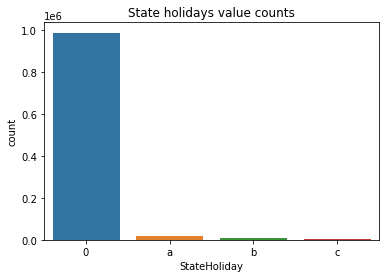

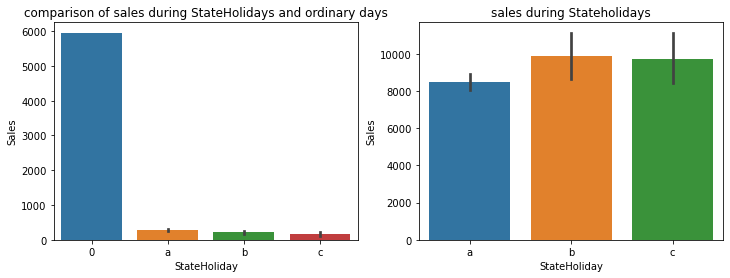

In [22]:

# state holiday + Sales

# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
train_set["StateHoliday"].loc[train_set["StateHoliday"] == 0] = "0"
sns.countplot(x='StateHoliday', data=train_set).set_title('State holidays value counts')


# holidays + no_holidays
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='StateHoliday', y='Sales', data=train_set, ax=axis1).set_title('comparison of sales during StateHolidays and ordinary days')
# holidays only
mask = (train_set["StateHoliday"] != "0") & (train_set["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_set[mask], ax=axis2).set_title('sales during Stateholidays')

#fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
#sns.barplot(x='StateHoliday', y='Customers', data=train_set, ax=axis1).set_title('comparison of customers during StateHolidays and ordinary days')
# holidays only
#mask = (train_set["StateHoliday"] != "0") & (train_set["Customers"] > 0)
#sns.barplot(x='StateHoliday', y='Customers', data=train_set[mask], ax=axis2).set_title('customers during Stateholidays')'''

Text(0.5, 1.0, 'Sales during Schoolholidays')

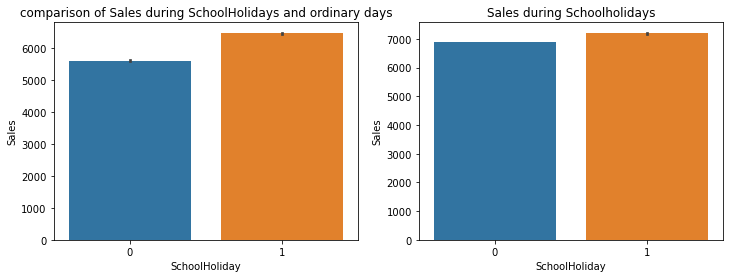

In [23]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='SchoolHoliday', y='Sales', data=train_set, ax=axis1).set_title('comparison of Sales during SchoolHolidays and ordinary days')
# holidays only
mask = (train_set["SchoolHoliday"] != "0") & (train_set["Sales"] > 0)
sns.barplot(x='SchoolHoliday', y='Sales', data=train_set[mask], ax=axis2).set_title('Sales during Schoolholidays')

Text(0.5, 1.0, 'customers during Stateholidays')

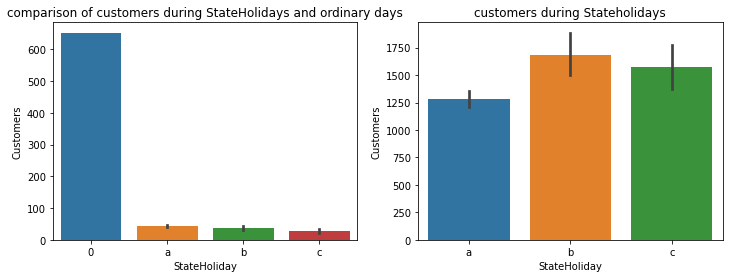

In [24]:

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x='StateHoliday', y='Customers', data=train_set, ax=axis1).set_title('comparison of customers during StateHolidays and ordinary days')
# holidays only
mask = (train_set["StateHoliday"] != "0") & (train_set["Customers"] > 0)
sns.barplot(x='StateHoliday', y='Customers', data=train_set[mask], ax=axis2).set_title('customers during Stateholidays')

0 represents no holidays. Counts are higher as you can see.
- a - public holiday
- b - easter
- c - christmas

## Correlation

Top 6 features higly correlated with sales


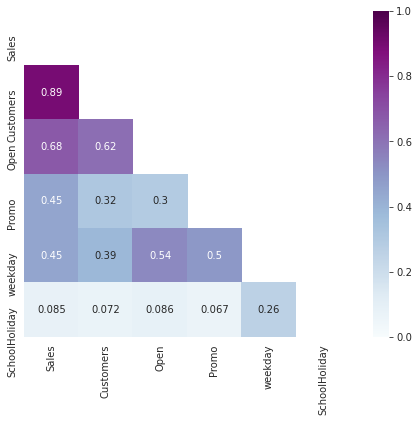

In [25]:
def correlation_map(f_data, f_feature, f_number):
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(8, 6))
        f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                           annot=True, annot_kws={"size": 10}, cmap="BuPu")

    plt.show()

print('Top 6 features higly correlated with sales')
correlation_map(train_set, 'Sales', 6)

The number of cutomers and Sales share the same box color in the above correlation. 89% of correlation is between customers and sales.

Text(0.5, 1.0, 'customers across different Promo')

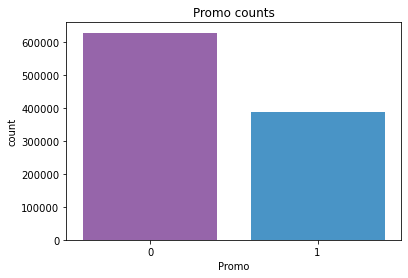

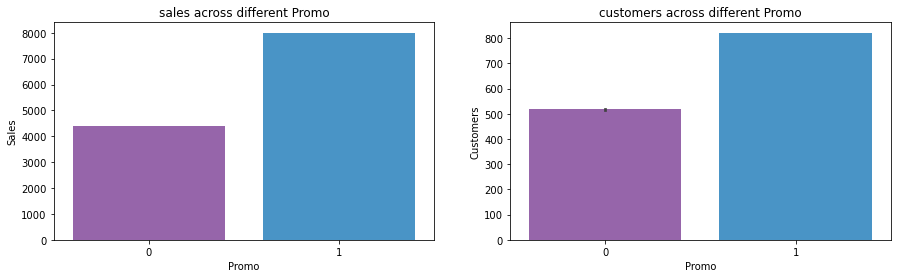

In [26]:
#Promo
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.countplot(x='Promo', data=train_set, palette = flatui).set_title('Promo counts')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=train_set, palette = flatui, ax=axis1).set_title('sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=train_set, ax=axis2,  palette = flatui).set_title('customers across different Promo')

As you can see, Sales are lower when there is no promo(0) and higher when there is promo(1)

Text(0.5, 1.0, 'customers across different days of the week ')

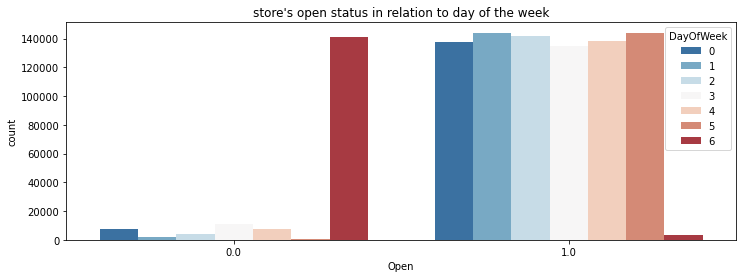

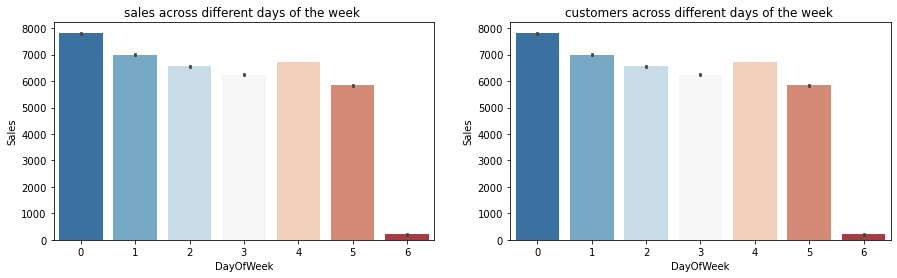

In [27]:
# dayofweek + open

#let's explore open in relation to day of week
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_set, ax=axis1, palette = 'RdBu_r')
plt.title("store's open status in relation to day of the week")


# sales across dayofweek
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_set, palette = 'RdBu_r', ax=axis1).set_title('sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Sales', data=train_set, palette = 'RdBu_r', ax=axis2).set_title('customers across different days of the week ')

The amount of sales and number of customers align with the trend across the week.
The days 0 to 5 are the most opening ones. On sundays(day 6 according to my data set), most stores do not open. 

Text(0.5, 1.0, 'customer behavior during weekends and weekdays')

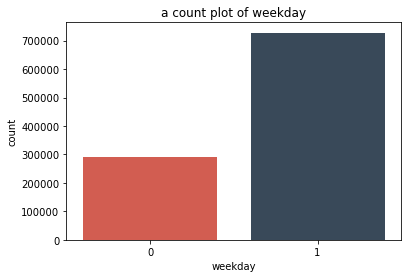

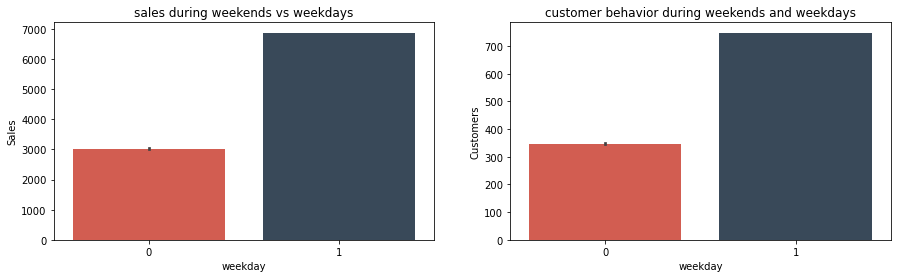

In [28]:
# weekday
flatui = [ "#e74c3c", "#34495e"]
sns.countplot(x='weekday', data=train_set, palette = flatui).set_title('a count plot of weekday')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='weekday', y='Sales', data=train_set, ax=axis1, palette = flatui).set_title('sales during weekends vs weekdays')
sns.barplot(x='weekday', y='Customers', data=train_set, ax=axis2, palette = flatui).set_title('customer behavior during weekends and weekdays')

On weekends, sales are low compared to sales in week days
It's probably because most stores aren't open on sundays. People take a break from work on sunday


Text(0.5, 1.0, 'customers across different assortment types')

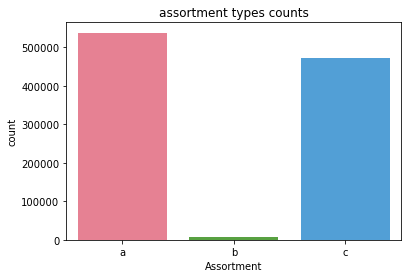

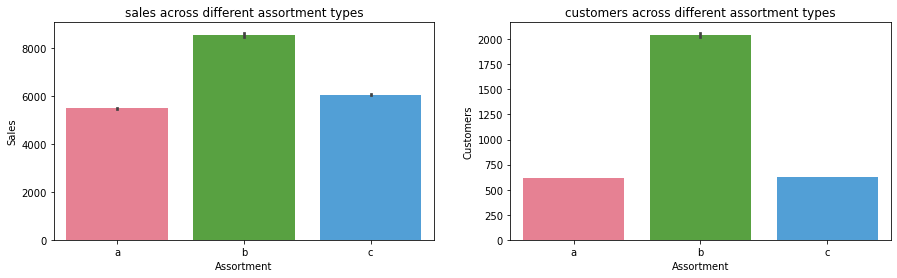

In [29]:
# assortment type
sns.countplot(x='Assortment', data=train_set, order=['a','b','c'], palette = 'husl').set_title('assortment types counts')


fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=train_set, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=train_set, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('customers across different assortment types')

Reminder: Assortment -describes an assortment level: a = basic, b = extra, c = extended

Assortment stores b; the extra stores are of a small number but the most attended. We see a high sales volume in b. 

**Competition distance**

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

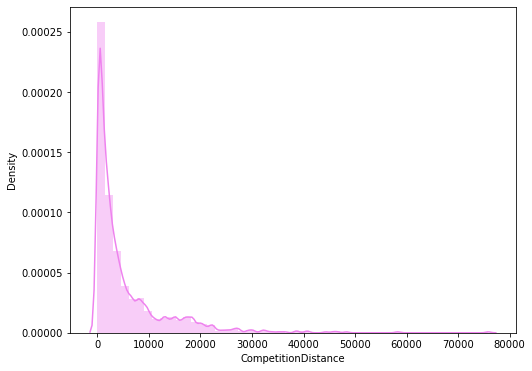

In [30]:

#CompetitionDistance
plt.figure(figsize = (8,6))
sns.distplot(train_set.CompetitionDistance, color = 'violet')

<AxesSubplot:>

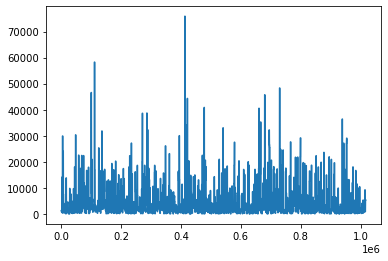

In [31]:
train_set['CompetitionDistance'].plot()

In [32]:
train_set[['Sales', 'CompetitionDistance']].sort_values(['CompetitionDistance'], ascending=False).head(5)

,Sales,CompetitionDistance
413247,10275,75860.0
413085,4493,75860.0
413083,4813,75860.0
413082,7182,75860.0
413081,5600,75860.0


In [33]:
train_set.groupby(['StoreType']).mean()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day,WeekOfYear,weekday,Sales
StoreType,,,,,,,,,,,,,,,,,,
a,560.079706,2.998278,659.034880,0.828598,0.381606,0.178405,5166.879362,7.124813,2008.423272,0.467501,23.307896,2011.402769,5.862808,2013.833030,15.703392,23.682925,0.715445,5738.179710
b,562.045610,2.998042,1987.720846,0.983133,0.381933,0.184207,1066.058117,6.821478,2007.880985,0.285913,22.792672,2011.512318,5.920720,2013.835692,15.705496,23.926216,0.715477,10058.837334
c,608.225402,2.998144,673.265894,0.825621,0.381789,0.180159,3516.699503,7.034902,2008.366516,0.498816,22.212321,2011.27014,5.895279,2013.834522,15.704560,23.819336,0.715463,5723.629246
d,533.561864,2.998552,501.434892,0.826987,0.381213,0.178130,6951.487191,7.267928,2008.630094,0.570473,23.250038,2011.370845,5.793517,2013.829844,15.700817,23.391826,0.715409,5641.819243


In [34]:
# Seasonality
#Date train
'''Data is from Jan 2013 to July 2015'''
time_data = train_set[['Date', 'Sales']]
time_data['datetime'] = pd.to_datetime(time_data['Date'])
time_data = time_data.set_index('datetime')
time_data = time_data.drop(['Date'], axis = 1)

<Figure size 864x360 with 0 Axes>

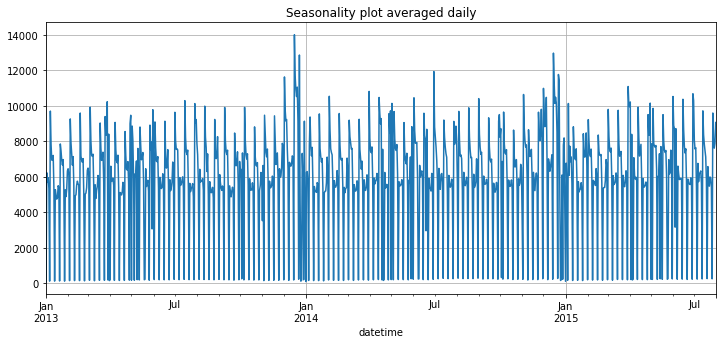

In [35]:
# daily train
daily_time_data = time_data.Sales.resample('D').mean() 
plt.figure(figsize = (12,5))
plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged daily')
daily_time_data.plot()
plt.grid()

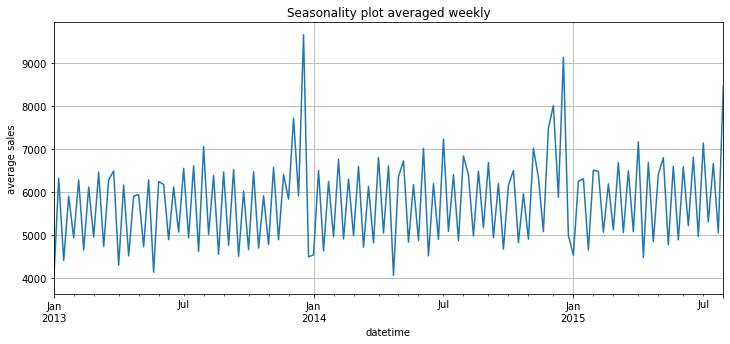

In [36]:
# weekly train
weekly_time_data = time_data.Sales.resample('W').mean() 
plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged weekly')
plt.ylabel('average sales')
weekly_time_data.plot()
plt.grid()

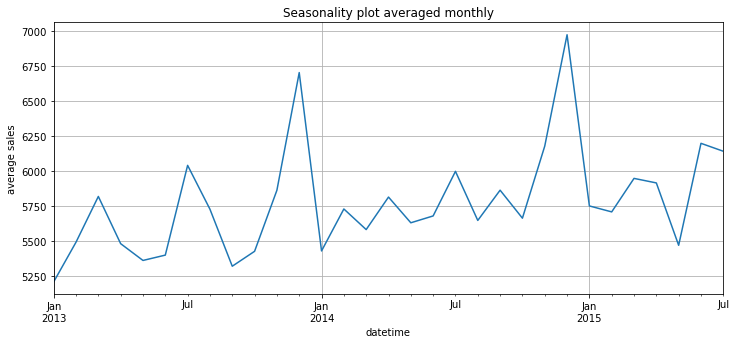

In [37]:
# Monthly train
monthly_time_data = time_data.Sales.resample('M').mean() 
plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged monthly')
plt.ylabel('average sales')
monthly_time_data.plot()
plt.grid()

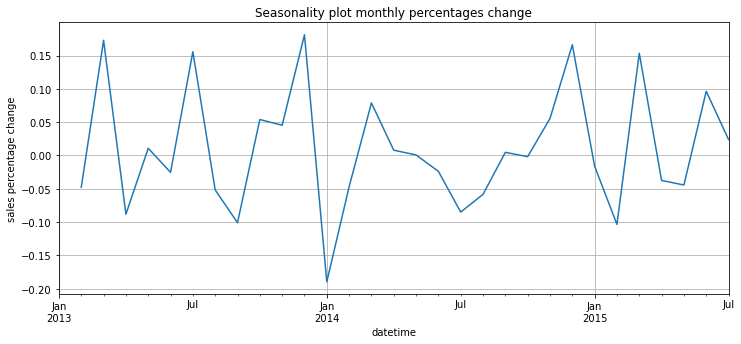

In [38]:
# Monthly percentage
monthly_time_data = time_data.Sales.resample('M').sum().pct_change()
plt.figure(figsize = (12,5))
plt.title('Seasonality plot monthly percentages change')
plt.ylabel('sales percentage change')
monthly_time_data.plot()
# pct_change_sales = rossmann_df.groupby('Date')["Sales"].sum().pct_change()
plt.grid()

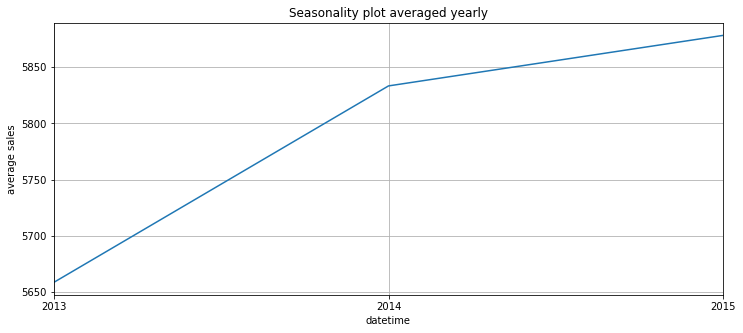

In [39]:
# yearly train
yearly_time_data = time_data.Sales.resample('Y').mean() 
plt.figure(figsize = (12,5))
plt.title('Seasonality plot averaged yearly')
plt.ylabel('average sales')
yearly_time_data.plot()
plt.grid()